<p style="background:#003F7D; color:white; font-size: 2.1em; text-align:center"> 
    <br><br><b> Coursera Courses Analysis </b><br><br><br>
</p>

<h2 style="color:#003F7D">Introduction </h2>

<h3 style="color:#003F7D">Data Description </h3>

This dataset contains mainly 6 columns and 890 course data.

1. course_title : Contains the course title.
2. course_organization : It tells which organization is conducting the courses.
3. course_Certificate_type : It has details about what are the different certifications available in courses.
4. course_rating : It has the ratings associated with each course.
5. course_difficulty : It tells about how difficult or what is the level of the course.
6. course_students_enrolled : It has the number of students that are enrolled in the course.

<h3 style="color:#003F7D">Questions / Goals </h3>

These questions will be used as a reference in this notebook:
1. What are the best evaluated courses?
2. Which courses have the greatest amount of enrolled students?
3. Through the data, can we have a hint about which subjects are more often available in coursera courses?
4. What are the organizations that have the greatest amount of courses availables?
5. How are the ratings distributed? Do they change in relation to some specific feature?

<h2 style="color:#003F7D">Data Loading and Imports </h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as tkr

import seaborn as sns

sns.set(style="whitegrid")
from wordcloud import WordCloud

from suplement_functions import (
    clear_barplot,
    clear_scatterplot,
    clear_countplot,
    group_column,
)

In [2]:
coursera_data = pd.read_csv("coursera_data.csv", index_col=0)

<h2 style="color:#003F7D">Basic Exploratory Data Analysis </h2>

<p style = "background:'white'; color:#003F7D">
- This section aims at getting initial insights of the data.
</p>

<h3 style="color:#003F7D">General </h3>

In [3]:
coursera_data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [4]:
coursera_data.shape

(891, 6)

In [5]:
# Categorical and numerical columns
coursera_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


<p style = "background:#eaf4ff; color:#003F7D">
    - Only 1 numerical object (rating).<br>
    - Students_enrolled has can be turned into numerical.
</p>


In [6]:
coursera_data.describe()

,course_rating
count,891.000000
mean,4.677329
std,0.162225
min,3.300000
25%,4.600000
50%,4.700000
75%,4.800000
max,5.000000


In [7]:
coursera_data.describe(include=["object"]).T

,count,unique,top,freq
course_title,891,888,Developing Your Musicianship,2
course_organization,891,154,University of Pennsylvania,59
course_Certificate_type,891,3,COURSE,582
course_difficulty,891,4,Beginner,487
course_students_enrolled,891,205,120k,22


<p style = "background:#eaf4ff; color:#003F7D">
    - Mean for course ratings is 4.6 (scale from 0 to 5).<br>
    - Some courses are duplicated. Why?<br>
    - Organization with most courses is the University of Pennsylvania (59 courses).<br>
    - Beginner courses represent more than half of the courses (487 courses).<br>
    - The top value for enrolled students seems to be 120k, we will see further that this is wrong.
</p>

<h3 style="color:#003F7D">Missing Values </h3>

In [8]:
coursera_data.isna().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

<h3 style="color:#003F7D">Duplicated rows </h3>

In [9]:
coursera_data.loc[coursera_data.duplicated()]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled


<p style = "background:#eaf4ff; color:#003F7D">
- No duplicated rows and no missing values<br>
</p>

<h2 style="color:#003F7D">Data Preparation </h2>

<p style = "background:'white'; color:#003F7D">
    - This section aims at preparing the data to further use. <br>
    - Changes in columns names and transformation of "Students Enrolled" into numerical.
</p>

<h3 style="color:#003F7D">Columns name </h34>

In [10]:
coursera_data.columns

Index(['course_title', 'course_organization', 'course_Certificate_type',
       'course_rating', 'course_difficulty', 'course_students_enrolled'],
      dtype='object')

In [11]:
# Change in column names
coursera_data.rename(
    columns={
        "course_title": "Title",
        "course_organization": "Organization",
        "course_Certificate_type": "Certificate Type",
        "course_rating": "Rating",
        "course_difficulty": "Difficulty",
        "course_students_enrolled": "Students Enrolled",
    },
    inplace=True,
)

In [12]:
coursera_data.head()

,Title,Organization,Certificate Type,Rating,Difficulty,Students Enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


<h3 style="color:#003F7D">Students Enrolled </h3>

In [13]:
# Is there any value that does not contain 'k'?
coursera_data[~coursera_data["Students Enrolled"].str.contains("k")]

,Title,Organization,Certificate Type,Rating,Difficulty,Students Enrolled
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m
47,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1.3m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m


In [14]:
# Transform the data to numerical and, change k to 1.000 and m to 1.000.000
# eval('1e3') -> 1000
coursera_data["Students Enrolled"] = (
    coursera_data["Students Enrolled"]
    .replace({"k": "*1e3", "m": "*1e6"}, regex=True)
    .map(pd.eval)
    .astype(int)
)

In [15]:
coursera_data.head()

,Title,Organization,Certificate Type,Rating,Difficulty,Students Enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


<h2 style="color:#003F7D">Exploratory Data Analysis </h2>

<p style = "background:'white'; color:#003F7D">
- The goal of this section is to get deeper insights from the data with feature-wise analysis
</p>

<h3 style="color:#003F7D">Course Titles </h3>

<h4 style="color:#003F7D">Duplicated courses </h4>

<p style = "background:'white'; color:#003F7D">What are the duplicated titles? and why?
</p>

In [16]:
duplicated_titles = (
    coursera_data["Title"].loc[coursera_data["Title"].duplicated()].values
)

In [17]:
coursera_data[coursera_data["Title"].isin(duplicated_titles)]

,Title,Organization,Certificate Type,Rating,Difficulty,Students Enrolled
756,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41000
205,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54000
181,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290000
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000
241,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81000
325,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39000


<p style = "background:#eaf4ff; color:#003F7D">
- The duplicate courses title refer to courses from the same Organization but with different levels of Difficulty, or to a different Organization<br>
</p>

<h4 style="color:#003F7D">Word cloud </h4>

<p style = "background:'white'; color:#003F7D">What are the most frequent words amongst the courses?
</p>

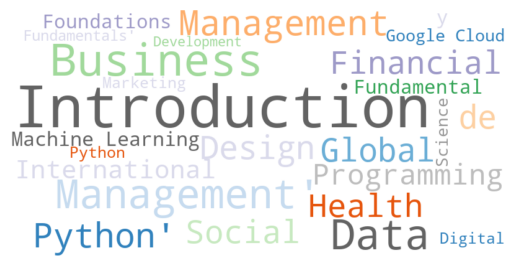

In [18]:
text = coursera_data["Title"].values
wordcloud = WordCloud(
    background_color="white", colormap="tab20c", width=800, height=400, max_words=25).generate(str(text))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

<p style = "background:#eaf4ff; color:#003F7D">
- As seen before in the basic EDA most of the courses are of beginner's level, this reflects in the most common word: Introduction.<br>
- Some of the areas that are more frequent are IT and Business.<br>
- "Health" is also presented in a good amount of courses, along with "Global" (maybe related to environmental concerns?).
</p>

<h4 style="color:#003F7D">Best evaluated courses </h4>

<p style = "background:'white'; color:#003F7D">What are the best evaluated courses?
</p>

In [19]:
coursera_data[["Title","Students Enrolled", "Rating"]].sort_values(by="Rating", ascending=False)

,Title,Students Enrolled,Rating
789,El Abogado del Futuro: Legaltech y la Transfor...,1500,5.0
401,Infectious Disease Modelling,1600,5.0
657,Stories of Infection,28000,4.9
278,Everyday Parenting: The ABCs of Child Rearing,86000,4.9
645,Boosting Creativity for Innovation,9500,4.9
...,...,...,...
873,Mathematics for Machine Learning: PCA,33000,4.0
779,iOS App Development with Swift,76000,3.9
178,Machine Learning for Trading,15000,3.9
352,Machine Learning and Reinforcement Learning in...,29000,3.7


<p style = "background:'white'; color:#003F7D">Ok, but maybe the first 2 courses don't have a number of students big enough.
</p>

In [20]:
coursera_data[["Title", "Students Enrolled", "Rating"]][
    coursera_data["Students Enrolled"] > 10_000
].sort_values(by="Rating", ascending=False).iloc[:10]

,Title,Students Enrolled,Rating
193,International Women's Health and Human Rights,35000,4.9
72,"Brand Management: Aligning Business, Brand and...",57000,4.9
234,"TESOL Certificate, Part 2: Teach English Now!",62000,4.9
559,Teach English Now! Foundational Principles,81000,4.9
21,COVID-19 Contact Tracing,220000,4.9
489,Microeconomics Principles,73000,4.9
587,The Horse Course: Introduction to Basic Care a...,29000,4.9
395,Build a Modern Computer from First Principles:...,95000,4.9
688,Bugs 101: Insect-Human Interactions,15000,4.9
467,Managerial Accounting Fundamentals,11000,4.9


<p style = "background:#eaf4ff; color:#003F7D">
- As the ratings are very high, it is not possible to define which courses really are the best.Other features would be needed<br>
</p>

<h4 style="color:#003F7D">Top 10 Titles in Students Enrolled </h4>

<p style = "background:'white'; color:#003F7D">What are the most frequented courses?
</p>

In [21]:
title_enrolled_students = (
    coursera_data[["Title", "Students Enrolled"]]
    .sort_values(by="Students Enrolled", ascending=False)
    .iloc[:10]
)

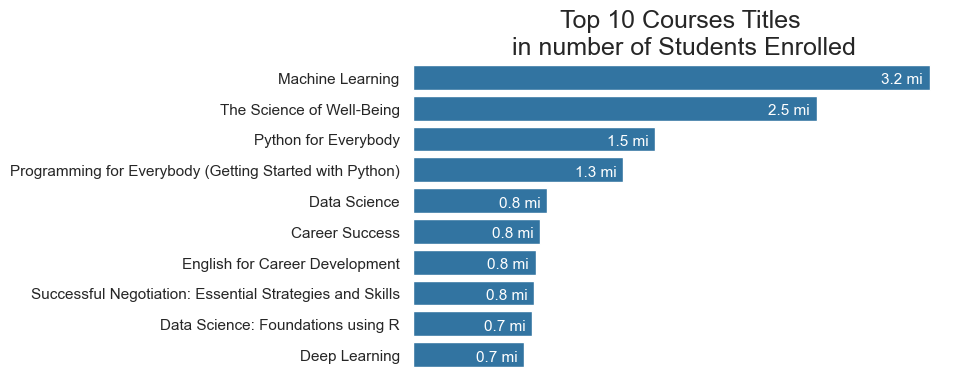

In [22]:
plt.figure(figsize=(7, 4))
ax = sns.barplot(
    y="Title", x="Students Enrolled", data=title_enrolled_students, color="#1f77b4"
)

clear_barplot("Top 10 Courses Titles \nin number of Students Enrolled")

# set the count on the bar
for p in ax.patches:
    ax.text(
        p.get_width() - 170000,
        p.get_y() + p.get_height() - 0.2,
        str("{:.1f}".format(int(p.get_width()) / 1_000_000)) + " mi",
        ha="center",
        color="w",
        fontsize=11,
    )

<p style = "background:#eaf4ff; color:#003F7D">
- This shows again that IT has a great number of students enrolled <br>
- Other areas with high number of students include Wellness and maybe Career Development<br>
</p>

<h3 style="color:#003F7D">Organizations </h3>

<h4 style="color:#003F7D">Top 10 organizations in available courses </h4>

<p style = "background:'white'; color:#003F7D">What are the Organizations with the highest amount of courses available?
</p>

In [23]:
organization_courses_available = group_column(coursera_data, "Organization")

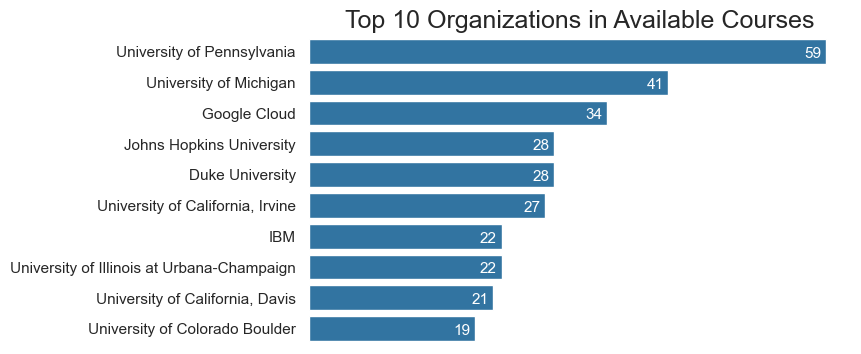

In [24]:
plt.figure(figsize=(7, 4))
ax = sns.barplot(
    y="Organization", x="count", data=organization_courses_available.iloc[:10], color="#1f77b4"
)

clear_barplot("Top 10 Organizations in Available Courses")

# set the count on the bar
for p in ax.patches:
    ax.text(
        p.get_width() - 1.5,
        p.get_y() + p.get_height() - 0.2,
        str(int(p.get_width())),
        ha="center",
        color="w",
        fontsize=11,
    )

<p style = "background:#eaf4ff; color:#003F7D">
- University of Pennsylvania and Michigan provide the greatest number of courses. <br>
</p>

<h4 style="color:#003F7D">Top 10 Organizations in number of students enrolled </h4>

<p style = "background:'white'; color:#003F7D">What Organizations have the highest amount students? Are they the same as in the courses available?
</p>

In [25]:
organization_students_enrolled = group_column(
    coursera_data, "Organization", "Students Enrolled"
)

In [26]:
colors = [
    "#1f77b4"
    if (org in organization_courses_available["Organization"].iloc[:10].values)
    else "#ff9194"
    for org in organization_students_enrolled["Organization"].iloc[:10]
]

C:\Users\renat\AppData\Local\Temp\ipykernel_9168\1690425335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


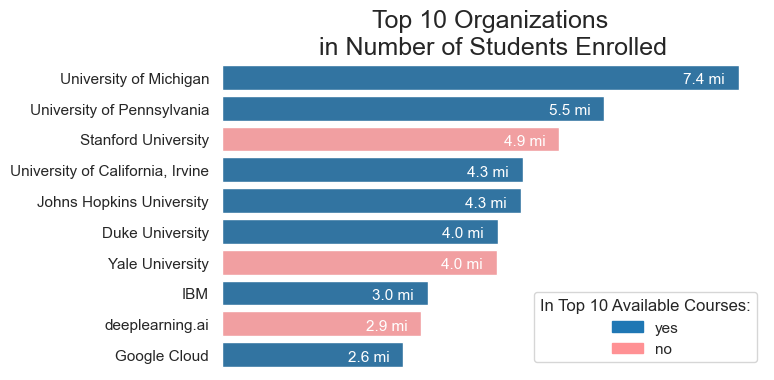

In [27]:
plt.figure(figsize=(7, 4))
ax = sns.barplot(
    data=organization_students_enrolled.iloc[:10],
    x="Students Enrolled",
    y="Organization",
    palette=colors,
)

clear_barplot("Top 10 Organizations \nin Number of Students Enrolled")

plt.legend(
    handles=[
        mpatches.Patch(color="#1f77b4", label="yes"),
        mpatches.Patch(color="#ff9194", label="no"),
    ],
    title="In Top 10 Available Courses:",
)

# set the count on the bar
for p in ax.patches:
    ax.text(
        p.get_width() - 500000,
        p.get_y() + p.get_height() - 0.2,
        str("{:.1f}".format(int(p.get_width()) / 1_000_000)) + " mi",
        ha="center",
        color="w",
        fontsize=11,
    )

<p style = "background:#eaf4ff; color:#003F7D">
- Most of the organizations with the highest number of students are also in the Top 10 available courses. <br>
- Which simply shows that the number of students registered for courses in one organization tends to be proportional to the number of courses availables.
</p>

<h4 style="color:#003F7D">Organizations - Enrolled Students versus Available Courses </h4>

<p style = "background:'white'; color:#003F7D"> Is this tendency (more Available Courses more Enrolled Students) also valid for the rest of the data?
</p>

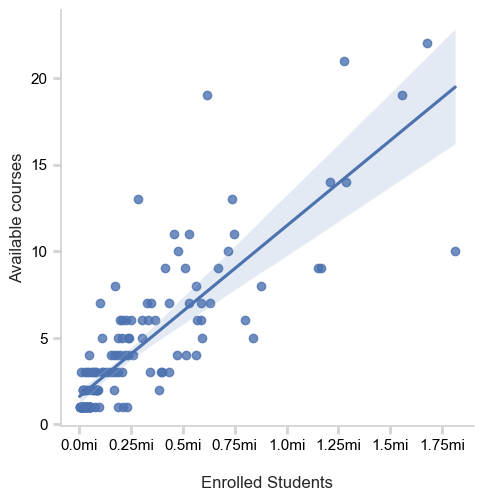

In [28]:
ax = sns.lmplot(
    y="count",
    x="Students Enrolled",
    data=organization_students_enrolled.merge(
        organization_courses_available, on="Organization"
    ).iloc[10:],
    fit_reg=True,
)

# set the milion tick on x plot
for a in ax.axes.flat:
    a.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x / 1_000_000}mi'))

clear_scatterplot("", "\nEnrolled Students","Available courses")

<p style = "background:#eaf4ff; color:#003F7D">
- There is a clear correlation between the amount of available courses in an Organization and the amount of students that enroll in the same Organization
</p>

<h3 style="color:#003F7D">Difficulty, Certificate Type and Rating </h3>

<h4 style="color:#003F7D">Difficulty Distribution</h4>

<p style = "background:'white'; color:#003F7D"> How is the Difficulty distrubuted?
</p>

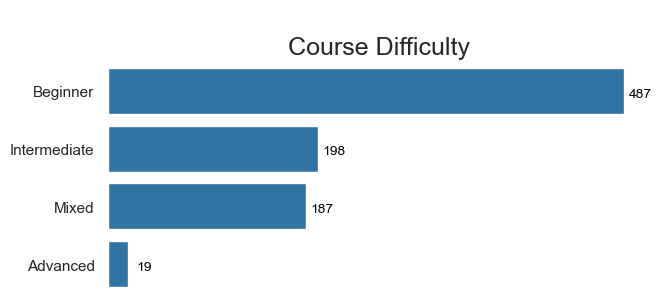

In [29]:
plt.figure(figsize=(7, 3))
ax = sns.countplot(y="Difficulty", data=coursera_data, color='#1f77b4')

clear_barplot("\nCourse Difficulty")

# set the count on the bar
for p in ax.patches:
    ax.text(p.get_width() + 15, p.get_y() + p.get_height() - 0.3,
            str(int(p.get_width())),
            ha='center', color='black', fontsize=10)

<p style = "background:#eaf4ff; color:#003F7D">
- The number of beginner courses is much greater than the other categories <br>
- Intermediate and Mixed courses have similar amount of available courses.
</p>

<h4 style="color:#003F7D">Certificate Type Distribution</h4>

<p style = "background:'white'; color:#003F7D">
    What is the most common certificate type?
</p>

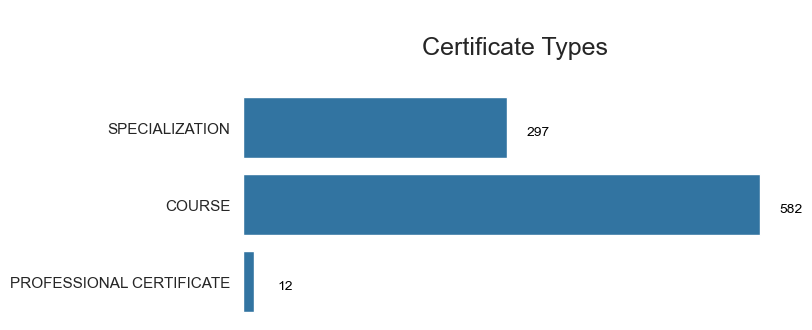

In [30]:
plt.figure(figsize=(7, 3))
ax = sns.countplot(y="Certificate Type", data=coursera_data,color='#1f77b4')

clear_barplot("\nCertificate Types\n")

# set the count on the bar
for p in ax.patches:
    ax.text(p.get_width() + 35 , p.get_y() + p.get_height() - 0.3,
            str(int(p.get_width())),
            ha='center', color='black', fontsize=10)

<p style = "background:#eaf4ff; color:#003F7D">
- The number of certificates of the type "Course" is almost double in relation to "Specialization"<br>
- Not many professional certification are available
</p>

<h4 style="color:#003F7D">Certificate Type per Difficulty</h4>

<p style = "background:'white'; color:#003F7D">
    Are there more courses of a specific difficulty for the different types of certificate?
</p>

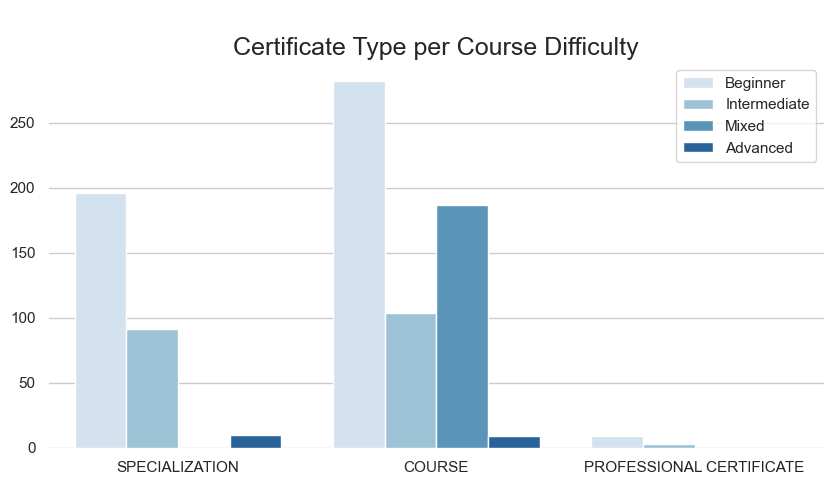

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(hue='Difficulty', x='Certificate Type', data=coursera_data, palette='Blues')

clear_countplot('\nCertificate Type per Course Difficulty')

<p style = "background:#eaf4ff; color:#003F7D">
- In general terms beginner courses are present more in greater amout for all certificate types. <br>
- "Specialization", which I take to be shorter courses don't present mixed difficulty courses;<br>
- For the certificate type "Course" the number of mixed difficulty is almost double than the intermediate.</p>

<h3 style="color:#003F7D">Ratings </h3>

<h4 style="color:#003F7D">Ratings distribution </h4>

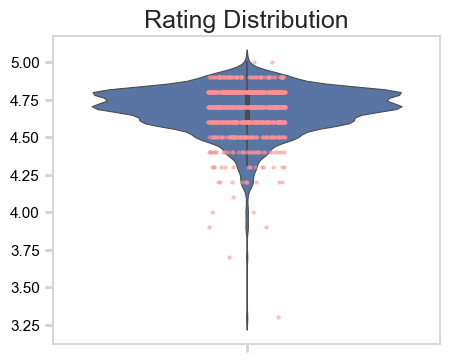

In [32]:
plt.figure(figsize=(5, 4))
sns.violinplot(y='Rating', data=coursera_data, linewidth=0.8)

sns.stripplot(y='Rating', data=coursera_data, size=3, color="#ff9194", alpha=0.6)

clear_scatterplot("Rating Distribution")

<p style = "background:#eaf4ff; color:#003F7D">
- The rating for the course tend to be very high, the lowest rating for 1 course is above 3. <br>
- Most of the ratings range between ca. 4.15 and 4.90. <br>
</p>

<h4 style="color:#003F7D">Ratings per Certificate Type </h4>

<p style = "background:'white'; color:#003F7D">
    Do the course evaluations change with the Certificate Type?
</p>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


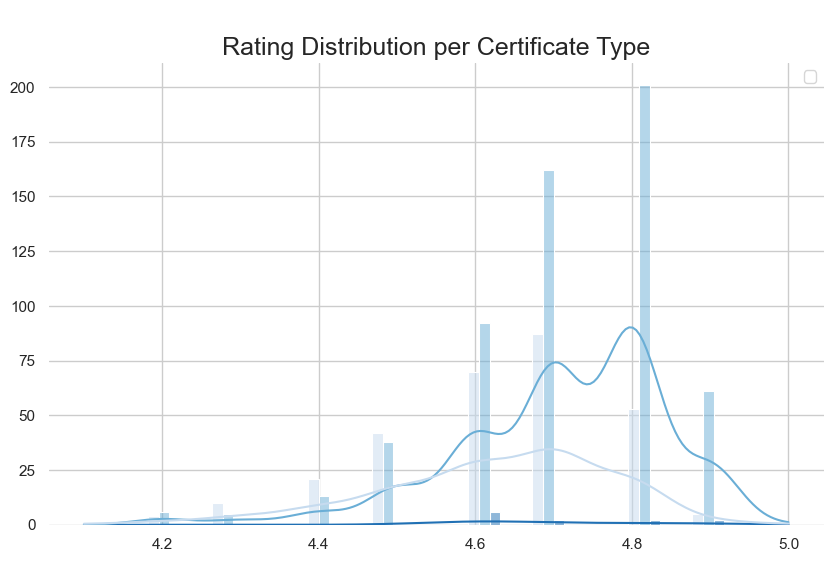

In [33]:
plt.figure(figsize=(10, 6))
#sns.countplot(hue='Rating', x='Certificate Type', data=coursera_data, palette='Blues')
sns.histplot(hue='Certificate Type', x='Rating', data=coursera_data[coursera_data['Rating'] > 4], palette='Blues', kde=True, multiple='dodge')

clear_countplot('\nRating Distribution per Certificate Type')

<p style = "background:#eaf4ff; color:#003F7D">
    - The proportion of 4.8 and 4.9 ratings is higher in Certificate type 'Course'. <br>
    - The trends in "Specialization" is similar to the general trend of ratings. <br>
    - "Professional certifcate" has well distributed values among the central interval.
</p>

<h4 style="color:#003F7D">Ratings per Difficult </h4>

<p style = "background:'white'; color:#003F7D">
    Do the course evaluations change with the course difficulty?
</p>

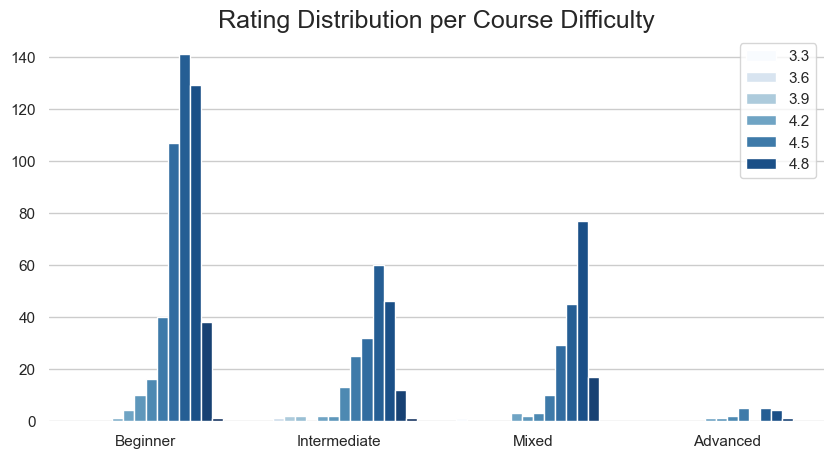

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(hue='Rating', x='Difficulty', data=coursera_data, palette='Blues')

clear_countplot('Rating Distribution per Course Difficulty')

<p style = "background:#eaf4ff; color:#003F7D">
    - The general distribution of 'Beginner' courses follows the general trend of the data (higher number of these courses).<br>
    - Advanced courses have smaller peaks, maybe due to a more critical decision about the course rate from the students. (but probably just due the smaller amount of courses in this category).<br>
</p>

<h4 style="color:#003F7D">Ratings per Students Enrolled</h4>

<p style = "background:'white'; color:#003F7D">
    Do the course evaluations change with the amount of Students Enrolled?
</p>

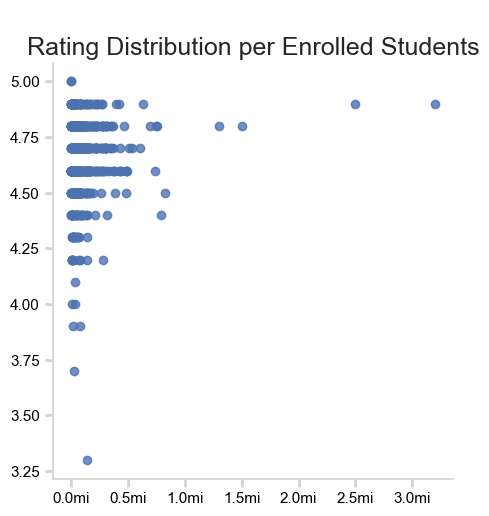

In [35]:
ax = sns.lmplot(y='Rating', x='Students Enrolled', data=coursera_data, fit_reg=False)

clear_scatterplot("\nRating Distribution per Enrolled Students")

# set the milion tick on x plot
for a in ax.axes.flat:
    a.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x / 1_000_000}mi'))

<p style = "background:#eaf4ff; color:#003F7D">
- No correlation to be seen. <br></p>

<h2 style="color:#003F7D">Conclusions </h2>

1. What are the best evaluated courses?
    - As the ratings are very high, many courses have the same score, other features would be needed for answering this question (i.e. rate of finishing the course).<br><br>
2. Which courses have the greatest amount of enrolled students?
    - Machine Learning, The Science of Well-Being, Python for Everybody.<br><br>
3. Through the data, can we have a hint about which subjects are more often available in coursera courses?
    - Yes, the WordCloud provided the most frequent words and through them we saw: IT, Business, Health and Global (Enviromental Science?, Globalization?, Geography?)<br>
    - The courses with the greatest amount of students also support IT as top area. <br><br>
4. What are the organizations that have the greatest amount of courses availables?
    - University of Pennsylvania and Michigan.<br>
    - Clear correlation between the amount of available courses and the amount of students that enroll in the Organization.<br><br>
5. How are the ratings distributed? Do they change in relation to some specific feature?
    - Most of the ratings range between ca. 4.15 and 4.90.<br>
    - Ratings did not seem to relevantly change with any other feature.